In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
shap.initjs()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
import math

## Machine Learning Packages
from sklearn.model_selection import train_test_split
import eli5
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,roc_curve,
accuracy_score, f1_score, precision_score, recall_score, auc)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
import joblib

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

In [2]:
df = pd.read_csv('train_data.csv')

In [3]:
df1 = df.copy()

In [5]:
df.shape

(5531451, 190)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5531451 entries, 0 to 5531450
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 7.8+ GB


In [7]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,NaN,0.000630,0.080986,0.708906,0.170600,0.006204,0.358587,0.525351,0.255736,NaN,0.063902,0.059416,0.006466,0.148698,1.335856,0.008207,0.001423,0.207334,0.736463,0.096219,NaN,0.023381,0.002768,0.008322,1.001519,0.008298,0.161345,0.148266,0.922998,0.354596,0.152025,0.118075,0.001882,0.158612,0.065728,0.018385,0.063646,0.199617,0.308233,0.016361,0.401619,0.091071,CR,O,0.007126,0.007665,NaN,0.652984,0.008520,NaN,0.004730,6.0,0.272008,0.008363,0.515222,0.002644,0.009013,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,NaN,0.007554,0.080422,0.069067,NaN,0.004327,0.007562,NaN,0.007729,0.000272,0.001576,0.004239,0.001434,NaN,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.506612,0.008033,1.009825,0.084683,0.003820,0.007043,0.000438,0.006452,0.000830,0.005055,NaN,0.0,0.005720,0.007084,NaN,0.000198,0.008907,NaN,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.893734,NaN,0.670041,0.009968,0.004572,NaN,1.008949,2.0,NaN,0.004326,NaN,NaN,NaN,1.007336,0.210060,0.676922,0.007871,1.0,0.238250,0.0,4.0,0.232120,0.236266,0.0,0.702280,0.434345,0.003057,0.686516,0.008740,1.0,1.003319,1.007819,1.000080,0.006805,NaN,0.002052,0.005972,NaN,0.004345,0.001535,NaN,NaN,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,NaN,0.002526,0.069419,0.712795,0.113239,0.006206,0.353630,0.521311,0.223329,NaN,0.065261,0.057744,0.001614,0.149723,1.339794,0.008373,0.001984,0.202778,0.720886,0.099804,NaN,0.030599,0.002749,0.002482,1.009033,0.005136,0.140951,0.143530,0.919414,0.326757,0.156201,0.118737,0.001610,0.148459,0.093935,0.013035,0.065501,0.151387,0.265026,0.017688,0.406326,0.086805,CR,O,0.002413,0.007148,NaN,0.647093,0.002238,NaN,0.003879,6.0,0.188970,0.004030,0.509048,0.004193,0.007842,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,NaN,0.004832,0.081413,0.074166,NaN,0.004203,0.005304,NaN,0.001864,0.000979,0.009896,0.007597,0.000509,NaN,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.500855,0.000760,1.009461,0.081843,0.000347,0.007789,0.004311,0.002332,0.009469,0.003753,NaN,0.0,0.007584,0.006677,NaN,0.001142,0.005907,NaN,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.906841,NaN,0.668647,0.003921,0.004654,NaN,1.003205,2.0,NaN,0.008707,NaN,NaN,NaN,1.007653,0.184093,0.822281,0.003444,1.0,0.247217,0.0,4.0,0.243532,0.241885,0.0,0.707017,0.430501,0.001306,0.686414,0.000755,1.0,1.008394,1.004333,1.008344,0.004407,NaN,0.001034,0.004838,NaN,0.

# Data Cleaning

- First in data cleaning is to check on missing values and how to deal with them

In [4]:
fill_rate = pd.DataFrame(df.isnull().sum()).reset_index().rename(columns = {'index' : 'column' , 0 : 'missing_rate'})
fill_rate['missing_rate'] = fill_rate['missing_rate'].apply(lambda i: int(i)/len(df))
missing = len(fill_rate[fill_rate['missing_rate'] > 0])
fill_rate['missing_rate'] = fill_rate['missing_rate'].apply(lambda i: f'{i:.20f}').apply(lambda i: np.round(float(i),5))

In [9]:
fill_rate['missing_rate'].describe()

count    190.000000
mean       0.153057
std        0.319169
min        0.000000
25%        0.000000
50%        0.001250
75%        0.031950
max        0.999300
Name: missing_rate, dtype: float64

- I will be dropping all the columns that have greater than the 3rd quartile

In [5]:
missing_rate = fill_rate['missing_rate'].describe().loc['75%']
mr = len(fill_rate[fill_rate['missing_rate'] >= missing_rate])
print(f'There are {missing} number of columns with missing values')
print(f'There are {mr} number of columns with the specified missing rate and more')
columns_to_drop = fill_rate[fill_rate['missing_rate'] >= missing_rate].column.tolist()
df = df.drop(columns_to_drop , axis = 1)

There are 122 number of columns with missing values
There are 60 number of columns with the specified missing rate and more


In [6]:
fill_rate = pd.DataFrame(df.isnull().sum()).reset_index().rename(columns = {'index' : 'column' , 0 : 'missing_rate'})
fill_rate['missing_rate'] = fill_rate['missing_rate'].apply(lambda i: int(i)/len(df))
missing = len(fill_rate[fill_rate['missing_rate'] > 0])
fill_rate['missing_rate'] = fill_rate['missing_rate'].apply(lambda i: f'{i:.20f}').apply(lambda i: np.round(float(i),5))

In [7]:
fill_rate = fill_rate.reset_index(drop = True)

In [13]:
df.shape

(5531451, 130)

In [8]:
for n in fill_rate.index:
    fill_rate.loc[n,'number_of_records'] = math.ceil(fill_rate.loc[n,'missing_rate'] * df.shape[0])

In [9]:
fill_rate['number_of_records'].max()

157204.0

In [17]:
df.dropna().shape

(5151744, 130)

In [18]:
5531451 - 5151744

379707

In [19]:
(5531451 - 379707)/5531451

0.9313549012727402

- I will be retaining 93% of the data if i just flat out drop the missing values

In [9]:
df = df.dropna()

In [10]:
fill_rate = pd.DataFrame(df.isnull().sum()).reset_index().rename(columns = {'index' : 'column' , 0 : 'missing_rate'})
fill_rate['missing_rate'] = fill_rate['missing_rate'].apply(lambda i: int(i)/len(df))
missing = len(fill_rate[fill_rate['missing_rate'] > 0])
fill_rate['missing_rate'] = fill_rate['missing_rate'].apply(lambda i: f'{i:.20f}').apply(lambda i: np.round(float(i),5))

- get the true labels of the training data

In [11]:
labels = pd.read_csv('train_labels.csv')

In [24]:
labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [25]:
df.shape

(5151744, 130)

In [12]:
df = pd.merge(labels,df, on = 'customer_ID')

In [13]:
correlations = pd.DataFrame(df.corr().loc['target']).sort_values(by = 'target' , ascending = False)

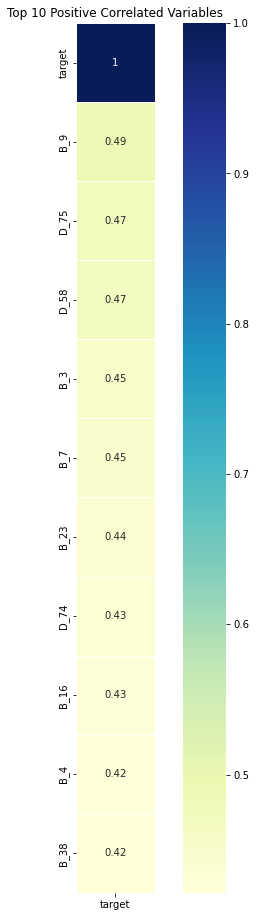

In [15]:
plt.figure(figsize=(10, 16))
sns.heatmap(correlations.head(11) , square = True , annot = True , 
            linewidths = .6 , cmap="YlGnBu")
plt.title('Top 10 Positive Correlated Variables')
plt.show()

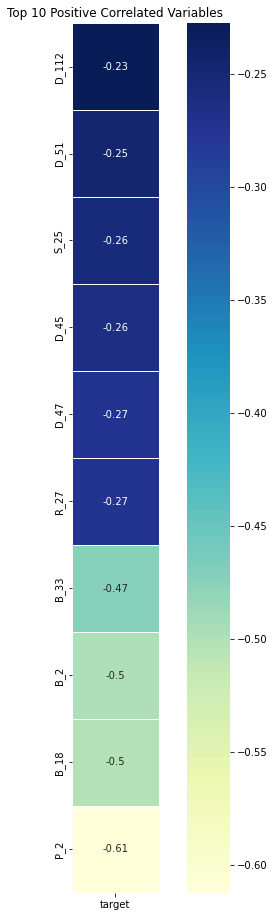

In [16]:
plt.figure(figsize=(10, 16))
sns.heatmap(correlations.tail(10) , square = True , annot = True , 
            linewidths = .6 , cmap="YlGnBu")
plt.title('Top 10 Positive Correlated Variables')
plt.show()

In [14]:
cor = df.corr()

In [39]:
cor.head()

,target,P_2,D_39,B_1,B_2,R_1,D_41,B_3,B_4,D_45,B_5,R_2,D_47,B_6,B_7,B_8,D_51,B_9,R_3,D_52,B_10,S_5,B_11,S_6,D_54,R_4,B_12,S_8,B_13,R_5,D_58,B_14,D_59,D_60,B_15,S_11,D_65,B_16,B_18,B_19,B_20,S_12,R_6,S_13,B_21,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,B_25,B_26,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
target,1.000000,-0.612461,0.186819,0.404524,-0.499224,0.372189,0.256768,0.451289,0.421756,-0.263547,-0.063255,0.271979,-0.273007,-0.040969,0.445303,0.318599,-0.247361,0.485586,0.278790,-0.224671,-0.021053,0.047403,0.383686,-0.137668,-0.141318,0.228528,-0.026618,-0.152447,-0.028677,0.172787,0.466206,0.089899,0.194849,-0.081572,0.010117,-0.079353,0.093484,0.425735,-0.504230,0.406990,0.404906,0.006246,0.111872,-0.108752,0.089084,0.387711,0.310909,-0.080037,0.186677,0.189235,0.438000,0.224341,0.434412,0.472630,0.112545,0.067241,0.194667,0.020592,0.225081,0.159126,0.067233,0.067263,0.241479,0.087337,0.003151,0.187051,0.030587,-0.139914,0.239470,0.103914,0.036853,0.131093,0.194597,0.125744,0.368876,-0.008126,-0.065670,0.076954,0.001750,-0.060954,0.007618,0.107540,0.100999,0.130779,0.113932,0.151175,-0.472693,0.114367,0.067307,0.016806,-0.120952,-0.146751,-0.035726,-0.068161,0.154550,0.064226,-0.058908,0.094464,0.253352,0.102130,-0.255738,-0.041118,0.023720,0.123988,0.123297,0.121618,0.047671,0.401652,-0.273508,0.421402,-0.020041,-0.227672,0.016540,-0.026779,-0.179807,-0.184279,-0.132380,0.096937,0.213152,0.234490,0.142013,0.021596,0.128668,0.118919,0.125612,0.128705,-0.002707,0.117737
P_2,-0.612461,1.000000,-0.195543,-0.380218,0.557212,-0.470414,-0.323509,-0.469691,-0.465062,0.334304,0.060577,-0.402586,0.395110,0.050901,-0.521607,-0.387624,0.318424,-0.558921,-0.299029,0.261907,0.024814,-0.037928,-0.353670,0.159634,0.214092,-0.326321,0.027249,0.174948,0.031077,-0.259272,-0.566391,-0.078370,-0.255280,0.094383,-0.003801,0.050329,-0.106254,-0.504904,0.605860,-0.426549,-0.475415,-0.002827,-0.167164,0.111388,-0.063708,-0.388680,-0.341651,0.086582,-0.343532,-0.209635,-0.510580,-0.267477,-0.520852,-0.560566,-0.138457,-0.096845,-0.180529,-0.016089,-0.205682,-0.216227,-0.046341,-0.071102,-0.280908,-0.071530,-0.002160,-0.338396,-0.027020,0.179070,-0.283058,-0.168808,-0.064129,-0.203572,-0.336396,-0.115477,-0.368140,0.012295,0.072042,-0.132291,-0.005424,0.071479,-0.002781,-0.110580,-0.127526,-0.105556,-0.200496,-0.124428,0.544371,-0.201034,-0.109513,-0.011098,0.137781,0.174315,0.065207,0.080100,-0.258559,-0.074088,0.054370,-0.108366,-0.298663,-0.116575,0.312681,0.037000,0.011120,-0.107350,-0.106389,-0.108021,-0.019737,-0.380000,0.304036,-0.479412,0.023362,0.306637,-0.023247,0.069873,0.255634,0.263955,0.204262,-0.124791,-0.215174,-0.215096,-0.144173,-0.014529,-0.185520,-0.139636,-0.180917,-0.185565,0.004312,-0.166604
D_39,0.186819,-0.195543,1.000000,0.183629,-0.190014,0.193423,0.433252,0.169385,0.168464,0.032677,0.046406,0.231726,-0.009384,-0.018880,0.126332,0.002586,0.004160,0.185903,0.038758,-0.021098,-0.010813,0.099768,0.177547,-0.237953,-0.283168,0.170531,0.035982,0.159782,0.052512,0.155111,0.130197,0.182373,0.033443,0.129310,0.124595,0.098025,0.242129,0.202603,-0.222895,0.086062,0.195384,0.029513,0.067991,0.160258,0.022101,0.147630,0.078228,-0.009647,0.075802,-0.086753,0.128859,-0.008071,0.115538,0.146281,0.082879,0.054343,0.170149,0.076595,0.052395,0.157855,0.022094,0.023896,0.106723,-0.006066,0.015607,0.099493,0.025235,-0.105225,0.182059,0.091590,0.018524,0.092301,0.121210,0.011865,0.081060,0.068320,0.040505,0.049725,0.000881,-0.083315,0.000797,0.075213,0.004161,0.029679,0.051170,0.038169,-0.242731,0.079376,0.020793,0.008587,0.018414,0.033525,-0.002858,-0.015289,0.071256,0.050046,0.052809,0.133983,0.175161,0.15

In [29]:
correlations.target.describe()

count    128.000000
mean       0.088990
std        0.227957
min       -0.612461
25%       -0.030439
50%        0.095701
75%        0.199425
max        1.000000
Name: target, dtype: float64

In [30]:
correlations[correlations['target'] >= 0.199425].shape , correlations[correlations['target'] <= -0.030439].shape

((32, 1), (32, 1))

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151744 entries, 0 to 5151743
Columns: 131 entries, customer_ID to D_145
dtypes: float64(126), int64(2), object(3)
memory usage: 5.1+ GB


In [16]:
for n in df.columns:
    if df[n].dtype == 'O':
        print(n)

customer_ID
S_2
D_63


In [34]:
df['D_63'].value_counts()

CO    3814886
CR     876738
CL     427059
XZ      19875
XM       7107
XL       6079
Name: D_63, dtype: int64

In [16]:
df = df.drop('S_2' , axis = 1)
df2 = pd.get_dummies(df, columns = ['D_63'])
df2 = df2.set_index('customer_ID')

In [33]:
df2.target.value_counts()

0    3919402
1    1232342
Name: target, dtype: int64

In [38]:
df2.head()

,target,P_2,D_39,B_1,B_2,R_1,D_41,B_3,B_4,D_45,B_5,R_2,D_47,B_6,B_7,B_8,D_51,B_9,R_3,D_52,B_10,S_5,B_11,S_6,D_54,R_4,B_12,S_8,B_13,R_5,D_58,B_14,D_59,D_60,B_15,S_11,D_65,B_16,B_18,B_19,B_20,S_12,R_6,S_13,B_21,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,B_25,B_26,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ
customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,0.938469,0.001733,0.008724,1.006838,0.009228,0.008771,0.004709,0.080986,0.708906,0.170600,0.006204,0.525351,0.063902,0.059416,0.006466,1.335856,0.008207,0.001423,0.207334,0.096219,0.023381,0.002768,0.008322,1.001519,0.008298,0.148266,0.922998,0.118075,0.001882,0.158612,0.018385,0.063646,0.199617,0.016361,0.401619,0.007126,0.007665,0.652984,0.008520,0.004730,0.272008,0.008363,0.515222,0.002644,0.004808,0.008342,0.119403,0.004802,0.108271,0.050882,0.007554,0.080422,0.069067,0.004327,0.007562,0.007729,0.000272,0.004239,0.001434,0.002271,0.004061,0.007121,0.002456,0.002310,0.003532,0.008033,1.009825,0.084683,0.003820,0.000438,0.006452,0.000830,0.005055,0.0,0.005720,0.007084,0.000198,0.008907,1,0.002537,0.005177,0.006626,0.009705,0.007782,0.002450,1.001101,0.002665,0.007479,0.006893,1.503673,1.006133,0.003569,0.008871,0.003950,0.003647,0.004950,0.894090,0.135561,0.911191,0.974539,0.001243,0.766688,1.008691,1.004587,0.670041,0.009968,0.004572,1.008949,2.0,0.004326,1.007336,0.210060,1.0,1.003319,1.007819,1.000080,0.006805,0.002052,0.005972,0.004345,0.001535,0.002427,0.003706,0.003818,0.000569,0.000610,0.002674,0,0,1,0,0,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,0.936665,0.005775,0.004923,1.000653,0.006151,0.000798,0.002714,0.069419,0.712795,0.113239,0.006206,0.521311,0.065261,0.057744,0.001614,1.339794,0.008373,0.001984,0.202778,0.099804,0.030599,0.002749,0.002482,1.009033,0.005136,0.143530,0.919414,0.118737,0.001610,0.148459,0.013035,0.065501,0.151387,0.017688,0.406326,0.002413,0.007148,0.647093,0.002238,0.003879,0.188970,0.004030,0.509048,0.004193,0.001283,0.006524,0.140611,0.000094,0.101018,0.040469,0.004832,0.081413,0.074166,0.004203,0.005304,0.001864,0.000979,0.007597,0.000509,0.009810,0.000127,0.005966,0.000395,0.001327,0.007773,0.000760,1.009461,0.081843,0.000347,0.004311,0.002332,0.009469,0.003753,0.0,0.007584,0.006677,0.001142,0.005907,1,0.008427,0.008979,0.001854,0.009924,0.005987,0.002247,1.006779,0.002508,0.006827,0.002837,1.503577,1.005791,0.000571,0.000391,0.008351,0.008850,0.003180,0.902135,0.136333,0.919876,0.975624,0.004561,0.786007,1.000084,1.004118,0.668647,0.003921,0.004654,1.003205,2.0,0.008707,1.007653,0.184093,1.0,1.008394,1.004333,1.008344,0.004407,0.001034,0.004838,0.007495,0.004931,0.003954,0.003167,0.005032,0.009576,0.005492,0.009217,0,0,1,0,0,0
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0,0.954180,0.091505,0.021655,1.009672,0.006815,0.007598,0.009423,0.068839,0.720884,0.060492,0.003259,0.524568,0.066982,0.056647,0.005126,1.337179,0.009355,0.007426,0.206629,0.134073,0.048367,0.010077,0.000530,1.009184,0.006961,0.137014,1.001977,0.114534,0.006328,0.139504,0.056653,0.070607,0.305883,0.063955,0.406768,0.001878,0.003636,0.645819,0.000408,0.004578,0.495308,0.006838,0.679257,0.001337,0.009393,0.002615,0.075868,0.007152,0.103239,0.047454,0.006561,0.078891,0.076510,0.001782,0.001422,0.005419,0.006149,0.003094,0.008295,0.009362,0.000954,0.005447,0.007345,0.007624,0.008811,0.004056,1.004291,0.081954,0.002709,0.007139,0.008358,0.002325,0.007381,0.0,0.005901,0.001185,0.008013,0.008882,1,

# Machine Learning - Vanilla Models

In [38]:
X_target = df2.drop('target', axis = 1)
y_target = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X_target, y_target, test_size = 0.2, random_state=42)

In [40]:
X_train.shape

(4121395, 133)

In [75]:
roc_auc = {}
f1 = {}
precision = {}
recall = {}

### XGBoost

In [33]:
%%time
xgb =  XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("roc auc on testing:",round(roc_auc_score(y_test,y_pred)*100,2) , "%")
joblib.dump(xgb, "my_xgb.joblib")

[[724898  58571]
 [ 62205 184675]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92    783469
           1       0.76      0.75      0.75    246880

    accuracy                           0.88   1030349
   macro avg       0.84      0.84      0.84   1030349
weighted avg       0.88      0.88      0.88   1030349

roc auc on testing: 83.66 %
Wall time: 17min 14s


In [39]:
# load
xgb = joblib.load("my_xgb.joblib")

In [41]:
%%time
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("roc auc on testing:",round(roc_auc_score(y_test,y_pred)*100,2) , "%")

[[724898  58571]
 [ 62205 184675]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92    783469
           1       0.76      0.75      0.75    246880

    accuracy                           0.88   1030349
   macro avg       0.84      0.84      0.84   1030349
weighted avg       0.88      0.88      0.88   1030349

roc auc on testing: 83.66 %
Wall time: 2.67 s


In [76]:
roc_auc['xgboost'] = round(roc_auc_score(y_test,y_pred),3)
f1['xgboost'] = round(f1_score(y_test,y_pred),3)
precision['xgboost'] = round(precision_score(y_test,y_pred),3)
recall['xgboost'] = round(recall_score(y_test,y_pred),3)

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

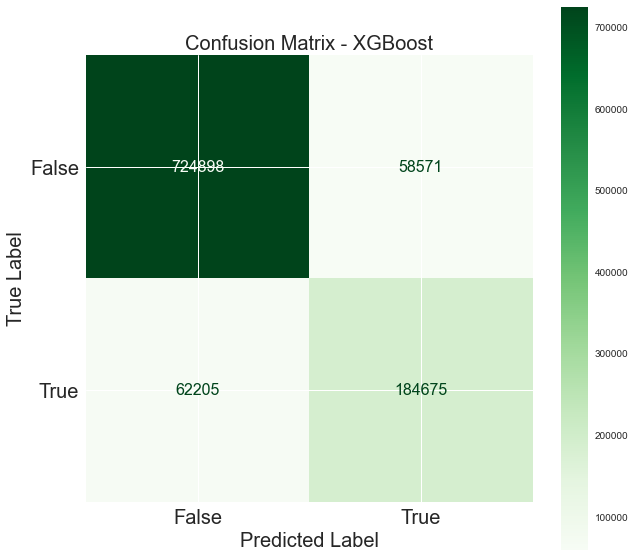

In [158]:
class_names = [False,True]
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams.update({'font.size': 16})
disp = plot_confusion_matrix(xgb, X_test, y_test, display_labels = class_names, cmap = plt.cm.Greens, ax = ax)
plt.xticks(size = 20)
plt.xlabel('Predicted Label',size = 20)
plt.yticks(size = 20)
plt.ylabel('True Label',size = 20)
plt.title('Confusion Matrix - XGBoost', size = 20)
plt.savefig('CM - XGB',dpi=300)

In [25]:
%%time
explainer_shap = shap.TreeExplainer(xgb)
shap_values = explainer_shap.shap_values(X_test)

Wall time: 1min 35s


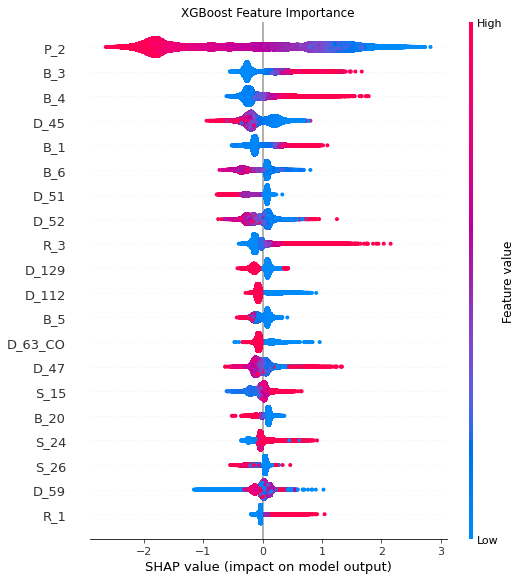

Wall time: 3min 17s


In [32]:
%%time
shap.summary_plot(shap_values, X_test, show = False)
plt.title('XGBoost Feature Importance')
plt.savefig('xgb features',dpi=300)
plt.show()

In [46]:
from xgboost import XGBClassifier, plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

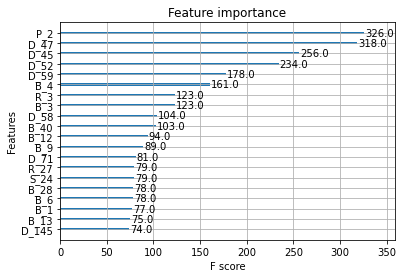

In [49]:
plot_importance(xgb, max_num_features = 20)

### Random Forest

In [57]:
%%time
rf =  RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print("roc auc on testing:",round(roc_auc_score(y_test,y_pred_rf)*100,2) , "%")

joblib.dump(rf, "my_random_forest.joblib")

[[732437  51032]
 [ 58440 188440]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    783469
           1       0.79      0.76      0.77    246880

    accuracy                           0.89   1030349
   macro avg       0.86      0.85      0.85   1030349
weighted avg       0.89      0.89      0.89   1030349

roc auc on testing: 84.91 %
Wall time: 3h 18min 21s


In [46]:
# load
rf = joblib.load("my_random_forest.joblib")

In [47]:
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print("roc auc on testing:",round(roc_auc_score(y_test,y_pred_rf)*100,2) , "%")

[[732437  51032]
 [ 58440 188440]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    783469
           1       0.79      0.76      0.77    246880

    accuracy                           0.89   1030349
   macro avg       0.86      0.85      0.85   1030349
weighted avg       0.89      0.89      0.89   1030349

roc auc on testing: 84.91 %


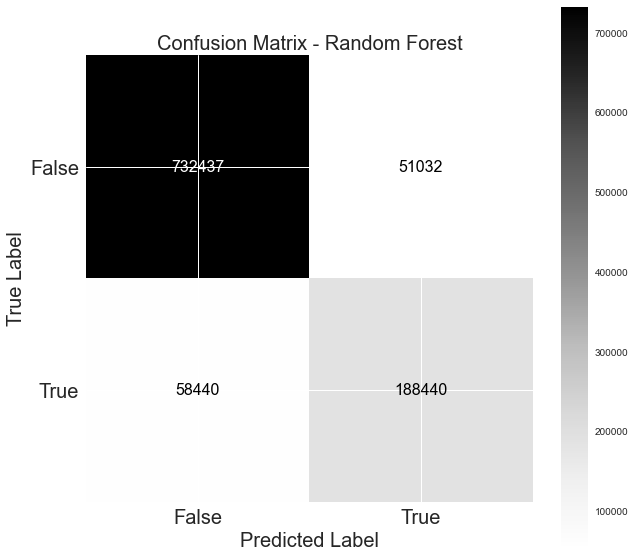

In [155]:
class_names = [False,True]
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams.update({'font.size': 16})
disp = plot_confusion_matrix(rf, X_test, y_test, display_labels = class_names, cmap = plt.cm.Greys, ax = ax);
plt.xticks(size = 20)
plt.xlabel('Predicted Label',size = 20)
plt.yticks(size = 20)
plt.ylabel('True Label',size = 20)
plt.title('Confusion Matrix - Random Forest', size = 20)
plt.savefig('CM - RF',dpi=300)

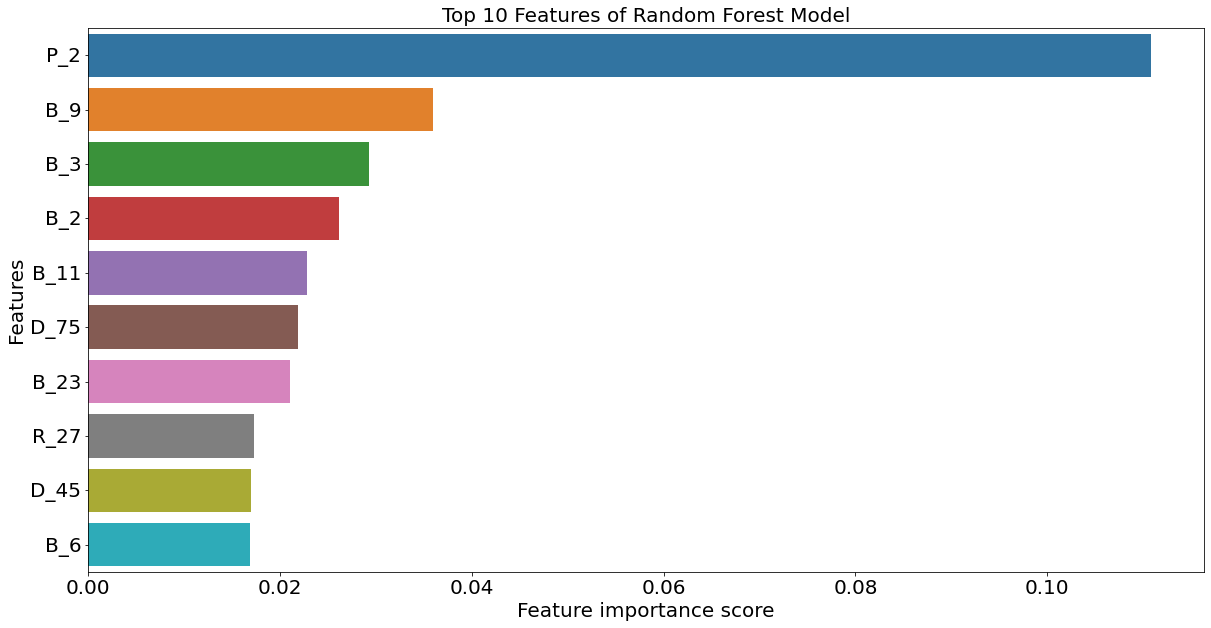

In [24]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Top 10 Features of Random Forest Model" , size = 20)
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score", size = 20)
plt.xticks(size = 20)
ax.set_ylabel("Features" , size = 20)
plt.yticks(size = 20)
plt.savefig('RF features',dpi=300)
plt.show()

In [77]:
roc_auc['random forest'] = round(roc_auc_score(y_test,y_pred_rf),3)
f1['random forest'] = round(f1_score(y_test,y_pred_rf),3)
precision['random forest'] = round(precision_score(y_test,y_pred_rf),3)
recall['random forest'] = round(recall_score(y_test,y_pred_rf),3)

### Naive Bayes

In [17]:
%%time

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

print(confusion_matrix(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))
print("roc_auc_score:",round(roc_auc_score(y_test,y_pred_gnb)*100,2) , "%")

joblib.dump(gnb, "gnb.joblib")

[[697713  85756]
 [ 79961 166919]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89    783469
           1       0.66      0.68      0.67    246880

    accuracy                           0.84   1030349
   macro avg       0.78      0.78      0.78   1030349
weighted avg       0.84      0.84      0.84   1030349

roc_auc_score: 78.33 %
Wall time: 16.2 s


['gnb.joblib']

In [49]:
gnb = joblib.load("gnb.joblib")

In [50]:
y_pred_gnb = gnb.predict(X_test)

print(confusion_matrix(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))
print("roc_auc_score:",round(roc_auc_score(y_test,y_pred_gnb)*100,2) , "%")

[[697713  85756]
 [ 79961 166919]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89    783469
           1       0.66      0.68      0.67    246880

    accuracy                           0.84   1030349
   macro avg       0.78      0.78      0.78   1030349
weighted avg       0.84      0.84      0.84   1030349

roc_auc_score: 78.33 %


In [78]:
roc_auc['naive bayes'] = round(roc_auc_score(y_test,y_pred_gnb),3)
f1['naive bayes'] = round(f1_score(y_test,y_pred_gnb),3)
precision['naive bayes'] = round(precision_score(y_test,y_pred_gnb),3)
recall['naive bayes'] = round(recall_score(y_test,y_pred_gnb),3)

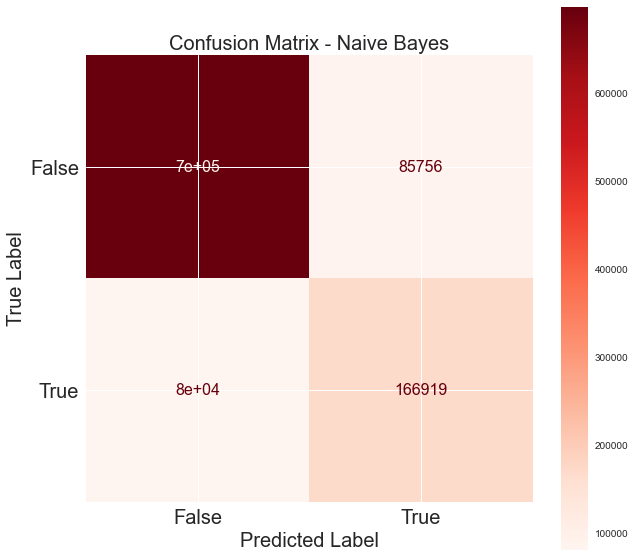

In [157]:
class_names = [False,True]
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams.update({'font.size': 16})
disp = plot_confusion_matrix(gnb, X_test, y_test, display_labels = class_names, cmap = plt.cm.Reds, ax = ax)
plt.xticks(size = 20)
plt.xlabel('Predicted Label',size = 20)
plt.yticks(size = 20)
plt.ylabel('True Label',size = 20)
plt.title('Confusion Matrix - Naive Bayes', size = 20)
plt.savefig('CM - NB',dpi=300)

In [ ]:
roc_auc['xgboost'] = round(roc_auc_score(y_test,y_pred),3)
f1['xgboost'] = round(f1_score(y_test,y_pred),3)
precision['xgboost'] = round(precision_score(y_test,y_pred),3)
recall['xgboost'] = round(recall_score(y_test,y_pred),3)

roc_auc['random forest'] = round(roc_auc_score(y_test,y_pred_rf),3)
f1['random forest'] = round(f1_score(y_test,y_pred_rf),3)
precision['random forest'] = round(precision_score(y_test,y_pred_rf),3)
recall['random forest'] = round(recall_score(y_test,y_pred_rf),3)

roc_auc['naive bayes'] = round(roc_auc_score(y_test,y_pred_gnb),3)
f1['naive bayes'] = round(f1_score(y_test,y_pred_gnb),3)
precision['naive bayes'] = round(precision_score(y_test,y_pred_gnb),3)
recall['naive bayes'] = round(recall_score(y_test,y_pred_gnb),3)

In [122]:
pred_prob1 = xgb.predict_proba(X_test)
pred_prob2 = rf.predict_proba(X_test)
pred_prob3 = gnb.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2,auc_score3)

0.9414388352368716 0.949003656092365 0.8922483706270592


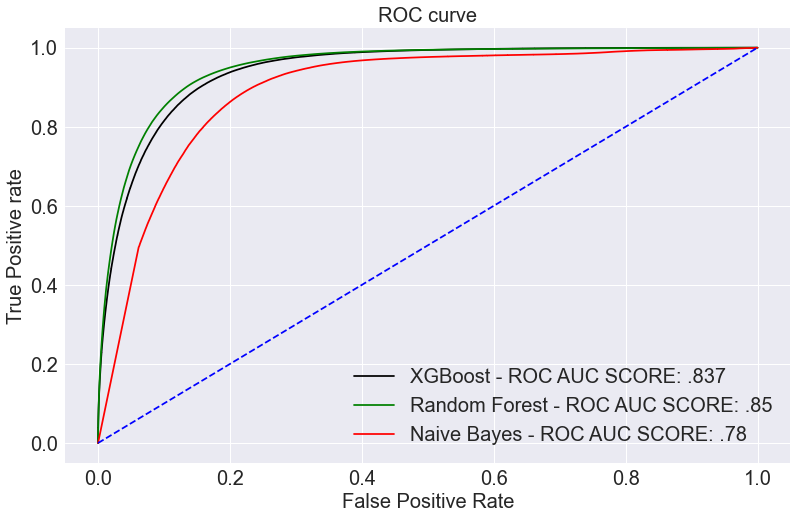

In [123]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (13,8)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='black', label='XGBoost - ROC AUC SCORE: .837')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Random Forest - ROC AUC SCORE: .85')
plt.plot(fpr3, tpr3, linestyle='-',color='red', label='Naive Bayes - ROC AUC SCORE: .78')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve' , size = 20)
# x label
plt.xlabel('False Positive Rate', size = 20)
plt.xticks(size = 20)
# y label
plt.ylabel('True Positive rate', size = 20)
plt.yticks(size = 20)

plt.legend(loc='best', prop={'size': 20})
plt.savefig('ROC',dpi=300)
plt.show();

In [79]:
ra = pd.DataFrame(roc_auc, index = ['roc_auc_score']).T.reset_index().rename(columns = {'index' : 'models'})
f1s = pd.DataFrame(f1, index = ['f1_score']).T.reset_index().rename(columns = {'index' : 'models'})
pre = pd.DataFrame(precision, index = ['precision']).T.reset_index().rename(columns = {'index' : 'models'})
rec = pd.DataFrame(recall, index = ['recall']).T.reset_index().rename(columns = {'index' : 'models'})

In [72]:
rec

,models,recall
0,xgboost,0.748
1,random forest,0.763
2,naive bayes,0.676


In [82]:
metrics_nonpca = ra.merge(f1s, on = 'models').merge(pre, on = 'models').merge(rec, on = 'models')
metrics_nonpca['PCA'] = False

In [83]:
metrics_nonpca

,models,roc_auc_score,f1_score,precision,recall,PCA
0,xgboost,0.837,0.754,0.759,0.748,False
1,random forest,0.849,0.775,0.787,0.763,False
2,naive bayes,0.783,0.668,0.661,0.676,False


# Machine Learning W/ PCA

In [95]:
%%time

from sklearn.decomposition import PCA

X_target = df2.drop('target', axis = 1)

pca = PCA(n_components = .95)
principalcomponents = pca.fit_transform(X_target)
pca_df = pd.DataFrame(principalcomponents)

y_target = df2['target']

X_train, X_test, y_train, y_test = train_test_split(pca_df, y_target, test_size = 0.2, random_state=42)

Wall time: 1min 9s


In [96]:
roc_auc = {}
f1 = {}
precision = {}
recall = {}

In [37]:
pca_df.shape

(5151744, 10)

### XGBoost

In [99]:
%%time
xgb_pca =  XGBClassifier()
xgb_pca.fit(X_train, y_train)
y_pred = xgb_pca.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("roc auc on testing:",round(roc_auc_score(y_test,y_pred)*100,2) , "%")
joblib.dump(xgb_pca,'xgb_pca.joblib')

[[717989  65480]
 [ 77741 169139]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    783469
           1       0.72      0.69      0.70    246880

    accuracy                           0.86   1030349
   macro avg       0.81      0.80      0.81   1030349
weighted avg       0.86      0.86      0.86   1030349

roc auc on testing: 80.08 %
Wall time: 2min 21s


['xgb_pca.joblib']

In [97]:
xgb_pca = joblib.load('xgb_pca.joblib')

In [100]:
y_pred = xgb_pca.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("roc auc on testing:",round(roc_auc_score(y_test,y_pred)*100,2) , "%")
joblib.dump(xgb,'xgb_pca.joblib')

[[717989  65480]
 [ 77741 169139]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    783469
           1       0.72      0.69      0.70    246880

    accuracy                           0.86   1030349
   macro avg       0.81      0.80      0.81   1030349
weighted avg       0.86      0.86      0.86   1030349

roc auc on testing: 80.08 %


['xgb_pca.joblib']

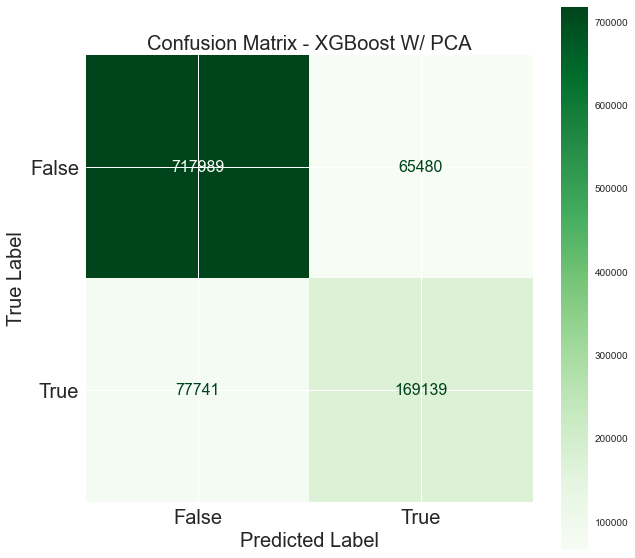

In [161]:
class_names = [False,True]
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams.update({'font.size': 16})
disp = plot_confusion_matrix(xgb_pca, X_test, y_test, display_labels = class_names, cmap = plt.cm.Greens, ax = ax)
plt.xticks(size = 20)
plt.xlabel('Predicted Label',size = 20)
plt.yticks(size = 20)
plt.ylabel('True Label',size = 20)
plt.title('Confusion Matrix - XGBoost W/ PCA', size = 20)
plt.savefig('CM - XGB_pca',dpi=300)

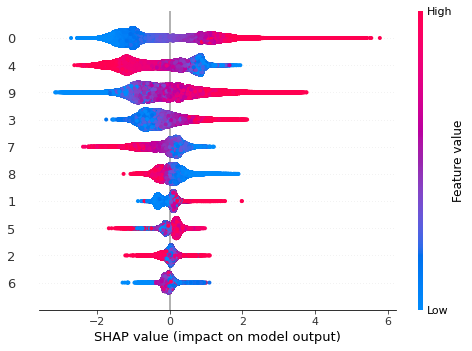

Wall time: 1min 53s


In [35]:
%%time
explainer_shap = shap.TreeExplainer(xgb)
shap_values = explainer_shap.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Random Forest

In [36]:
%%time
rf_pca =  RandomForestClassifier()
rf_pca.fit(X_train, y_train)
y_pred_rf = rf_pca.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print("roc auc on testing:",round(roc_auc_score(y_test,y_pred_rf)*100,2) , "%")
joblib.dump(rf, "rf_pca.joblib")

[[723759  59710]
 [ 75221 171659]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91    783469
           1       0.74      0.70      0.72    246880

    accuracy                           0.87   1030349
   macro avg       0.82      0.81      0.82   1030349
weighted avg       0.87      0.87      0.87   1030349

roc auc on testing: 80.96 %
Wall time: 51min 48s


In [101]:
rf_pca = joblib.load('rf_pca.joblib')

y_pred_rf = rf_pca.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print("roc auc on testing:",round(roc_auc_score(y_test,y_pred_rf)*100,2) , "%")

[[723759  59710]
 [ 75221 171659]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91    783469
           1       0.74      0.70      0.72    246880

    accuracy                           0.87   1030349
   macro avg       0.82      0.81      0.82   1030349
weighted avg       0.87      0.87      0.87   1030349

roc auc on testing: 80.96 %


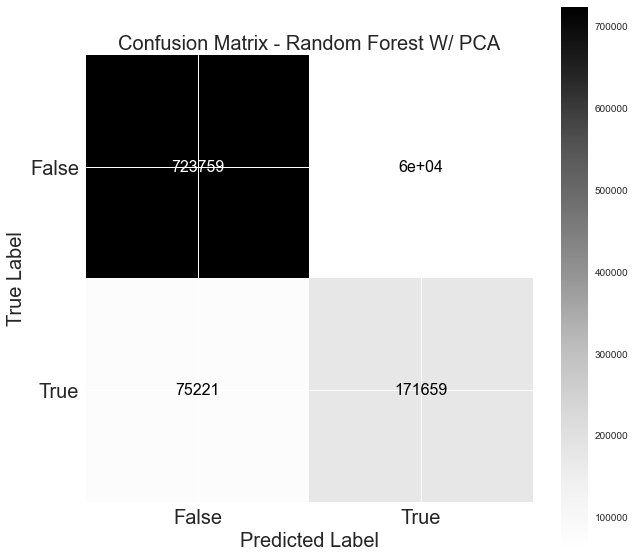

In [163]:
class_names = [False,True]
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams.update({'font.size': 16})
disp = plot_confusion_matrix(rf_pca, X_test, y_test, display_labels = class_names, cmap = plt.cm.Greys, ax = ax)
plt.xticks(size = 20)
plt.xlabel('Predicted Label',size = 20)
plt.yticks(size = 20)
plt.ylabel('True Label',size = 20)
plt.title('Confusion Matrix - Random Forest W/ PCA', size = 20)
plt.savefig('CM - RF_pca',dpi=300)

### Naive Bayes

In [20]:
%%time

gnb_pca = GaussianNB()
gnb_pca.fit(X_train, y_train)

y_pred_gnb = gnb_pca.predict(X_test)

print(confusion_matrix(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))
print("roc_auc_score:",round(roc_auc_score(y_test,y_pred_gnb)*100,2) , "%")

joblib.dump(gnb, "gnb_pca.joblib")

[[776789   6680]
 [227045  19835]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87    783469
           1       0.75      0.08      0.15    246880

    accuracy                           0.77   1030349
   macro avg       0.76      0.54      0.51   1030349
weighted avg       0.77      0.77      0.70   1030349

roc_auc_score: 53.59 %
Wall time: 2.66 s


['gnb_pca.joblib']

In [102]:
gnb_pca = joblib.load('gnb_pca.joblib')
y_pred_gnb = gnb_pca.predict(X_test)

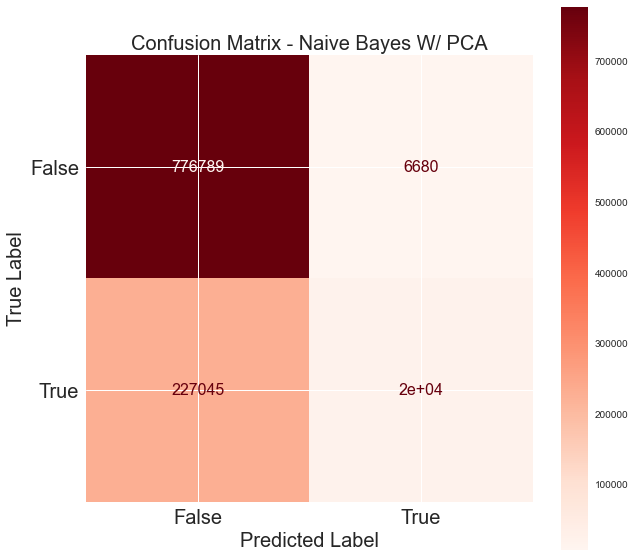

In [166]:
class_names = [False,True]
fig, ax = plt.subplots(figsize = (10,10))
plt.rcParams.update({'font.size': 16})
disp = plot_confusion_matrix(gnb_pca, X_test, y_test, display_labels = class_names, cmap = plt.cm.Reds, ax = ax)
plt.xticks(size = 20)
plt.xlabel('Predicted Label',size = 20)
plt.yticks(size = 20)
plt.ylabel('True Label',size = 20)
plt.title('Confusion Matrix - Naive Bayes W/ PCA', size = 20)
plt.savefig('CM - NB_pca',dpi=300)

In [95]:
xgb_pca = joblib.load('xgb_pca.joblib')
rf_pca= joblib.load('rf_pca.joblib')
gnb_pca= joblib.load('gnb_pca.joblib')

In [126]:
pred_prob1 = xgb_pca.predict_proba(X_test)
pred_prob2 = rf_pca.predict_proba(X_test)
pred_prob3 = gnb_pca.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2,auc_score3)

0.9208227743529485 0.927025003104039 0.8348926601836396


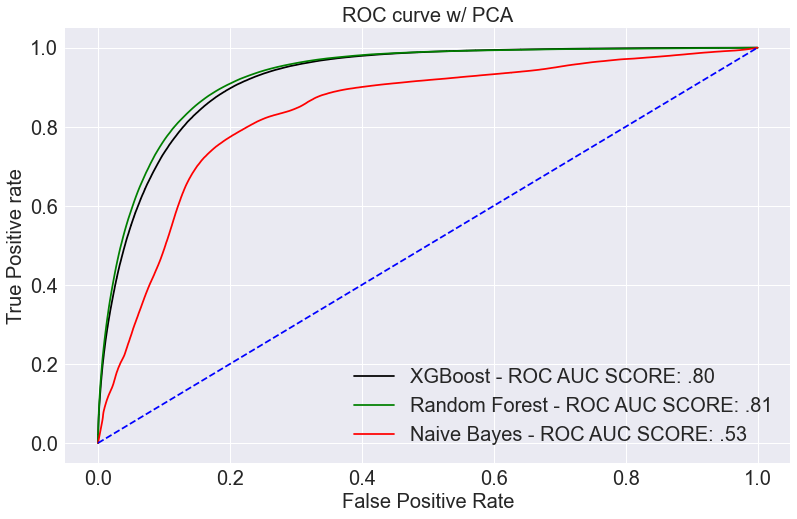

In [127]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (13,8)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='-',color='black', label='XGBoost - ROC AUC SCORE: .80')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Random Forest - ROC AUC SCORE: .81')
plt.plot(fpr3, tpr3, linestyle='-',color='red', label='Naive Bayes - ROC AUC SCORE: .53')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve w/ PCA' , size = 20)
# x label
plt.xlabel('False Positive Rate', size = 20)
plt.xticks(size = 20)
# y label
plt.ylabel('True Positive rate', size = 20)
plt.yticks(size = 20)

plt.legend(loc='best', prop={'size': 20})
plt.savefig('ROC_pca',dpi=300)
plt.show();

In [103]:
roc_auc['xgboost'] = round(roc_auc_score(y_test,y_pred),3)
f1['xgboost'] = round(f1_score(y_test,y_pred),3)
precision['xgboost'] = round(precision_score(y_test,y_pred),3)
recall['xgboost'] = round(recall_score(y_test,y_pred),3)

roc_auc['random forest'] = round(roc_auc_score(y_test,y_pred_rf),3)
f1['random forest'] = round(f1_score(y_test,y_pred_rf),3)
precision['random forest'] = round(precision_score(y_test,y_pred_rf),3)
recall['random forest'] = round(recall_score(y_test,y_pred_rf),3)

roc_auc['naive bayes'] = round(roc_auc_score(y_test,y_pred_gnb),3)
f1['naive bayes'] = round(f1_score(y_test,y_pred_gnb),3)
precision['naive bayes'] = round(precision_score(y_test,y_pred_gnb),3)
recall['naive bayes'] = round(recall_score(y_test,y_pred_gnb),3)

In [104]:
ra = pd.DataFrame(roc_auc, index = ['roc_auc_score']).T.reset_index().rename(columns = {'index' : 'models'})
f1s = pd.DataFrame(f1, index = ['f1_score']).T.reset_index().rename(columns = {'index' : 'models'})
pre = pd.DataFrame(precision, index = ['precision']).T.reset_index().rename(columns = {'index' : 'models'})
rec = pd.DataFrame(recall, index = ['recall']).T.reset_index().rename(columns = {'index' : 'models'})

In [105]:
metrics_pca = ra.merge(f1s, on = 'models').merge(pre, on = 'models').merge(rec, on = 'models')
metrics_pca['PCA'] = True

In [107]:
metrics = pd.concat([metrics_nonpca, metrics_pca], axis = 0)

In [113]:
metrics.reset_index(drop = True).sort_values(by = 'models')

,models,roc_auc_score,f1_score,precision,recall,PCA
2,naive bayes,0.783,0.668,0.661,0.676,False
5,naive bayes,0.536,0.145,0.748,0.080,True
1,random forest,0.849,0.775,0.787,0.763,False
4,random forest,0.810,0.718,0.742,0.695,True
0,xgboost,0.837,0.754,0.759,0.748,False
3,xgboost,0.801,0.703,0.721,0.685,True


# Combining 3 Models

In [18]:
X_target = df2.drop('target', axis = 1)
y_target = df2['target']

X_train, X_test, y_train, y_test = train_test_split(X_target, y_target, test_size = 0.2, random_state=42)

xgb = joblib.load("my_xgb.joblib")
rf = joblib.load("my_random_forest.joblib")
gnb = joblib.load("gnb.joblib")

In [19]:
## model 1
xgb_pred_test = xgb.predict(X_test)
xgb_pred_prob = xgb.predict_proba(X_test)

## model 2
rf_pred_test = rf.predict(X_test)
rf_pred_prob = rf.predict_proba(X_test)

## model 3
gnb_pred_test = gnb.predict(X_test)
gnb_pred_prob = gnb.predict_proba(X_test)

In [20]:
%%time
import tqdm

test = X_test.reset_index()

test['xgb_prediction'] = xgb_pred_test
test['xgb_probability'] = xgb_pred_prob.tolist()
test['xgb_probability'] = test['xgb_probability'].apply(lambda i: max(i))

test['rf_prediction'] = rf_pred_test
test['rf_probability'] = rf_pred_prob.tolist()
test['rf_probability'] = test['rf_probability'].apply(lambda i: max(i))

test['gnb_prediction'] = gnb_pred_test
test['gnb_probability'] = gnb_pred_prob.tolist()
test['gnb_probability'] = test['gnb_probability'].apply(lambda i: max(i))

Wall time: 4.21 s


In [188]:
test.head(10)

,customer_ID,P_2,D_39,B_1,B_2,R_1,D_41,B_3,B_4,D_45,B_5,R_2,D_47,B_6,B_7,B_8,D_51,B_9,R_3,D_52,B_10,S_5,B_11,S_6,D_54,R_4,B_12,S_8,B_13,R_5,D_58,B_14,D_59,D_60,B_15,S_11,D_65,B_16,B_18,B_19,B_20,S_12,R_6,S_13,B_21,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,B_25,B_26,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,xgb_prediction,xgb_probability,rf_prediction,rf_probability,gnb_prediction,gnb_probability
0,c27392a898df594a737b07da2cc927ff8421cc828e1095...,0.959865,0.007989,0.025368,1.003645,0.000748,0.081940,0.005295,0.052270,0.495733,0.190370,0.009989,0.346438,0.079614,0.057355,0.008748,0.004402,0.000347,0.003149,0.125465,0.095935,0.176080,0.010634,0.000092,1.008276,0.001800,0.091715,0.479424,0.077351,0.003380,0.104857,0.037632,0.063118,0.426519,0.044649,0.281976,0.003699,0.005835,0.646177,0.005240,0.001415,0.478846,0.003380,0.422574,0.007281,0.002465,0.005762,0.263272,0.006356,0.308887,0.049314,0.003100,0.078006,0.071985,0.006744,0.004363,0.003670,0.007296,0.004564,0.009797,0.004770,0.001847,0.001942,0.003441,0.006795,0.002397,0.004535,1.005454,0.055459,0.008925,0.002564,0.000178,0.001575,0.009054,0.0,0.005238,0.006838,0.006788,0.001857,1,0.000283,0.008095,0.003789,0.005678,0.005461,0.002463,1.001096,0.006444,0.004530,0.004299,0.003981,0.000079,0.007922,0.003807,0.000373,0.003542,0.004185,0.944249,0.134992,0.959864,0.969794,0.009966,0.408029,1.003148,0.948324,1.004360,0.006675,0.024856,1.003775,2.0,0.006052,0.011311,0.242103,1.0,1.008036,1.004203,1.003712,0.007910,1.004253,0.005680,0.006682,0.003221,0.003355,0.004259,0.003045,0.002590,0.006445,0.006454,0,0,1,0,0,0,0,0.986347,0,0.99,0,1.000000
1,9aeb2d7da6191832e7aa0569c277d67bbb7b0b4717e1a6...,0.431400,0.030438,0.105209,0.051770,0.505670,0.003772,0.207975,0.348318,0.038642,0.005628,0.008455,0.322959,0.010590,0.372163,1.004872,0.002943,0.614668,0.102576,0.053282,0.019009,0.067662,0.078049,0.000061,1.007011,0.001831,0.010083,0.001373,0.011830,0.006184,0.697353,0.032782,0.419906,0.096614,0.005931,0.282862,0.005168,1.006665,0.183750,0.258257,0.824752,0.186737,0.009093,0.009900,0.005580,0.000264,0.258833,0.012855,0.002161,0.500095,0.326835,0.009790,0.580134,0.604304,0.002872,0.000381,0.047841,0.002028,0.000896,0.009554,0.002034,0.202366,1.009794,0.002154,0.003660,0.007098,0.000429,1.001588,0.118305,0.009589,0.002354,0.002509,0.000723,0.002393,0.0,0.006529,0.001336,0.006736,0.007258,1,0.001293,0.006708,0.002437,0.001752,0.009974,0.005340,0.002231,0.006467,0.007772,0.004143,0.007847,0.005788,0.005724,0.007456,0.001176,0.007148,0.002797,0.967493,0.133761,0.962214,0.970926,0.005646,0.708026,1.004626,0.980842,0.338090,0.005124,0.112199,1.006420,5.0,0.002074,1.005314,0.341344,1.0,0.008438,0.005284,0.006492,0.001429,1.004648,0.005055,0.003303,0.001213,0.006040,0.007959,0.000927,0.008721,0.008714,0.005312,0,1,0,0,0,0,1,0.767680,1,0.80,1,0.999944
2,1d4392115044f5a8a568b45cc38d9ffc51f04715305235...,0.463619,0.271122,0.513165,0.028011,0.007381,0.007552,0.947942,0.452652,0.292292,0.012537,0.000329,0.532514,0.011090,0.714905,0.000200,0.001851,0.664131,0.202985,0.085101,0.012854,0.009447,0.461478,0.002148,1.003185,0.009014,0.006864,0.323931,0.013390,0.001776,0.835808,0.123327,0.500690,0.139919,0.006691,0.529236,0.005009,1.000604,0.057639,1.001928,1.001202,0.189572,0.005422,0.007028,0.005095,0.509789,0.250613,0.008454,0.007299,0.309271,0.732250,0.002750,0.643065,0.672935,0.009535,0.009039,0.204169,0.000522,1.509431,0.001113,0.001268,0.202962,0.007085,0.003865,0.001196,0.004327,0.000533,1.005991,0.409380,0.001469,0.000546,0.008517,0.001363,0.509393,1.0,0.000066,0.004172,0.008322,0.002916,1,0.004947,0.009304,0.005681,0.001124,0

In [21]:
%%time

for n in tqdm.tqdm(test.index):
    ## all 3 are equiuvalent
    if (test.loc[n,'xgb_prediction'] == test.loc[n,'rf_prediction']) & (test.loc[n, 'xgb_prediction'] == test.loc[n, 'gnb_prediction']):
        test.loc[n, 'final_prediction'] = test.loc[n,'xgb_prediction']
        test.loc[n,'final_average_probability'] = (test.loc[n,'xgb_probability'] + test.loc[n,'rf_probability'] + test.loc[n,'gnb_probability'])/3
    ## model 1 and 2 are equivalent
    elif (test.loc[n,'xgb_prediction'] == test.loc[n,'rf_prediction']) & (test.loc[n, 'xgb_prediction'] != test.loc[n, 'gnb_prediction']):
        test.loc[n,'final_prediction'] = test.loc[n,'xgb_prediction']
        test.loc[n,'final_average_probability'] = (test.loc[n,'xgb_probability'] + test.loc[n,'rf_probability'])/2
        ## model 1 and 3 are equivalent
    elif (test.loc[n,'xgb_prediction'] == test.loc[n,'gnb_prediction']) & (test.loc[n, 'xgb_prediction'] != test.loc[n, 'rf_prediction']):
        test.loc[n,'final_prediction'] = test.loc[n,'xgb_prediction']
        test.loc[n,'final_average_probability'] = (test.loc[n,'xgb_probability'] + test.loc[n,'gnb_probability'])/2
        ## model 2 and 3 are equivalent
    elif (test.loc[n,'rf_prediction'] == test.loc[n,'gnb_prediction']) & (test.loc[n, 'rf_prediction'] != test.loc[n, 'xgb_prediction']):
        test.loc[n,'final_prediction'] = test.loc[n,'rf_prediction']
        test.loc[n,'final_average_probability'] = (test.loc[n,'rf_probability'] + test.loc[n,'gnb_probability'])/2

100%|█████████████████████████████████████████████████████████████████████| 1030349/1030349 [2:30:55<00:00, 113.79it/s]

Wall time: 2h 30min 55s


In [23]:
test.head(20)

,customer_ID,P_2,D_39,B_1,B_2,R_1,D_41,B_3,B_4,D_45,B_5,R_2,D_47,B_6,B_7,B_8,D_51,B_9,R_3,D_52,B_10,S_5,B_11,S_6,D_54,R_4,B_12,S_8,B_13,R_5,D_58,B_14,D_59,D_60,B_15,S_11,D_65,B_16,B_18,B_19,B_20,S_12,R_6,S_13,B_21,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,B_25,B_26,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,S_17,R_12,B_28,R_13,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,xgb_prediction,xgb_probability,rf_prediction,rf_probability,gnb_prediction,gnb_probability,final_prediction,final_average_probability
0,c27392a898df594a737b07da2cc927ff8421cc828e1095...,0.959865,0.007989,0.025368,1.003645,0.000748,0.081940,0.005295,0.052270,0.495733,0.190370,0.009989,0.346438,0.079614,0.057355,0.008748,0.004402,0.000347,0.003149,0.125465,0.095935,0.176080,0.010634,0.000092,1.008276,0.001800,0.091715,0.479424,0.077351,0.003380,0.104857,0.037632,0.063118,0.426519,0.044649,0.281976,0.003699,0.005835,0.646177,0.005240,0.001415,0.478846,0.003380,0.422574,0.007281,0.002465,0.005762,0.263272,0.006356,0.308887,0.049314,0.003100,0.078006,0.071985,0.006744,0.004363,0.003670,0.007296,0.004564,0.009797,0.004770,0.001847,0.001942,0.003441,0.006795,0.002397,0.004535,1.005454,0.055459,0.008925,0.002564,0.000178,0.001575,0.009054,0.0,0.005238,0.006838,0.006788,0.001857,1,0.000283,0.008095,0.003789,0.005678,0.005461,0.002463,1.001096,0.006444,0.004530,0.004299,0.003981,0.000079,0.007922,0.003807,0.000373,0.003542,0.004185,0.944249,0.134992,0.959864,0.969794,0.009966,0.408029,1.003148,0.948324,1.004360,0.006675,0.024856,1.003775,2.0,0.006052,0.011311,0.242103,1.0,1.008036,1.004203,1.003712,0.007910,1.004253,0.005680,0.006682,0.003221,0.003355,0.004259,0.003045,0.002590,0.006445,0.006454,0,0,1,0,0,0,0,0.986347,0,0.99,0,1.000000,0.0,0.992116
1,9aeb2d7da6191832e7aa0569c277d67bbb7b0b4717e1a6...,0.431400,0.030438,0.105209,0.051770,0.505670,0.003772,0.207975,0.348318,0.038642,0.005628,0.008455,0.322959,0.010590,0.372163,1.004872,0.002943,0.614668,0.102576,0.053282,0.019009,0.067662,0.078049,0.000061,1.007011,0.001831,0.010083,0.001373,0.011830,0.006184,0.697353,0.032782,0.419906,0.096614,0.005931,0.282862,0.005168,1.006665,0.183750,0.258257,0.824752,0.186737,0.009093,0.009900,0.005580,0.000264,0.258833,0.012855,0.002161,0.500095,0.326835,0.009790,0.580134,0.604304,0.002872,0.000381,0.047841,0.002028,0.000896,0.009554,0.002034,0.202366,1.009794,0.002154,0.003660,0.007098,0.000429,1.001588,0.118305,0.009589,0.002354,0.002509,0.000723,0.002393,0.0,0.006529,0.001336,0.006736,0.007258,1,0.001293,0.006708,0.002437,0.001752,0.009974,0.005340,0.002231,0.006467,0.007772,0.004143,0.007847,0.005788,0.005724,0.007456,0.001176,0.007148,0.002797,0.967493,0.133761,0.962214,0.970926,0.005646,0.708026,1.004626,0.980842,0.338090,0.005124,0.112199,1.006420,5.0,0.002074,1.005314,0.341344,1.0,0.008438,0.005284,0.006492,0.001429,1.004648,0.005055,0.003303,0.001213,0.006040,0.007959,0.000927,0.008721,0.008714,0.005312,0,1,0,0,0,0,1,0.767680,1,0.80,1,0.999944,1.0,0.855875
2,1d4392115044f5a8a568b45cc38d9ffc51f04715305235...,0.463619,0.271122,0.513165,0.028011,0.007381,0.007552,0.947942,0.452652,0.292292,0.012537,0.000329,0.532514,0.011090,0.714905,0.000200,0.001851,0.664131,0.202985,0.085101,0.012854,0.009447,0.461478,0.002148,1.003185,0.009014,0.006864,0.323931,0.013390,0.001776,0.835808,0.123327,0.500690,0.139919,0.006691,0.529236,0.005009,1.000604,0.057639,1.001928,1.001202,0.189572,0.005422,0.007028,0.005095,0.509789,0.250613,0.008454,0.007299,0.309271,0.732250,0.002750,0.643065,0.672935,0.009535,0.009039,0.204169,0.000522,1.509431,0.001113,0.001268,0.202962,0.007085,0.003865,0.001196,0.004327,0.000533,1.005991,0.409380,0.001469,0.000546,0.008517,0.001363,0.509393,1.0,0.0000

In [114]:
test.to_csv('3_models.csv', index = False)